# EDA - GEDA
## Estancia de investigación Maestría de Ciencia de Datos
## Aide Jazmín González Cruz

### 1. Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from os.path import dirname
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sys.path.append(dirname('../src'))
from src.utils import utils, processing
import math

### 2. Carga de datos

In [2]:
df = utils.load_df("../data/preprocessing_data.pkl")
df

,newid,cx_curp,glucosa,colesterol,trigliceridos,hdl,ldl,presion_arterial,hba1c,plaquetas,...,hta_cie,renal_cie,fecha_laboratorio,dif_date_lab,dif_date_lab_from_ini,occurance_counter,año_dx_dm,año_dx_hta,year_consulta,FechaNuevaHipertension
0,2128MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,NaN,NaN,NaN,NaN,NaN,130/90,NaN,NaN,...,0.0,0.0,NaT,NaN,NaN,1,NaN,NaN,2003,2011-10-12
1,31723PEVR470901ASKH1QC1,PEVR470901ASKH1QC1,134,NaN,NaN,NaN,NaN,120/90,NaN,NaN,...,0.0,0.0,NaT,NaN,NaN,2,NaN,NaN,2004,2007-07-20
2,41103ROGG540607PNXOCQD4,ROGG540607PNXOCQD4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaT,NaN,NaN,3,NaN,NaN,2004,2007-06-18
3,46589PEVR470901ASKH1QC1,PEVR470901ASKH1QC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaT,NaN,NaN,4,NaN,NaN,2004,2007-07-20
4,47454MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaT,NaN,NaN,5,NaN,NaN,2004,2011-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,6410853MAVC341201G0YJFRC1,MAVC341201G0YJFRC1,110|0,NaN,NaN,NaN,NaN,130/75,NaN,NaN,...,0.0,0.0,NaT,NaN,NaN,4441,2000.0,2010.0,2021,2013-03-16
4995,3356716COAG580101F7ALKRC3,COAG580101F7ALKRC3,206|0,NaN,NaN,NaN,NaN,120/80,NaN,NaN,...,0.0,0.0,NaT,NaN,NaN,4442,1997.0,NaN,2021,2020-08-08
4996,3359740PAGJ690411WZ0YDRC1,PAGJ690411WZ0YDRC1,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaT,NaN,NaN,4443,NaN,NaN,2021,2020-08-19
4997,8273014MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,124,NaN,NaN,NaN,NaN,110/70,NaN,NaN,...,0.0,0.0,NaT,NaN,NaN,4444,NaN,NaN,2021,2011-10-12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   newid                   4999 non-null   object        
 1   cx_curp                 4999 non-null   object        
 2   glucosa                 2961 non-null   object        
 3   colesterol              269 non-null    float64       
 4   trigliceridos           270 non-null    float64       
 5   hdl                     28 non-null     float64       
 6   ldl                     25 non-null     float64       
 7   presion_arterial        4462 non-null   object        
 8   hba1c                   82 non-null     float64       
 9   plaquetas               69 non-null     float64       
 10  creatinina              135 non-null    float64       
 11  acido_urico             82 non-null     float64       
 12  urea                    53 non-null     float64 

### 3. Data profiling

- **Datos únicos por variable**

In [4]:
utils.unicos_val_by_col(df)

newid:  4999
cx_curp:  55
glucosa:  461
colesterol:  130
trigliceridos:  167
hdl:  21
ldl:  23
presion_arterial:  229
hba1c:  33
plaquetas:  61
creatinina:  25
acido_urico:  46
urea:  43
peso:  399
altura:  53
tfg:  42
imc:  75
fuente:  3
in_consulta:  4998
fecha_nacimiento:  55
sexo:  3
medicamentos:  4031
codigos_cie:  786
diagnosticos:  881
fecha_consulta:  4999
sistolica:  61
diastolica:  43
glucosa1:  273
glucosa2:  54
edad:  70
hta:  1
dm_cie:  2
hta_cie:  2
renal_cie:  2
fecha_laboratorio:  268
dif_date_lab:  181
dif_date_lab_from_ini:  248
occurance_counter:  4444
año_dx_dm:  20
año_dx_hta:  13
year_consulta:  19
FechaNuevaHipertension:  55


- **Variables numéricas**

In [5]:
number_variables = df.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(25,
 array(['colesterol', 'trigliceridos', 'hdl', 'ldl', 'hba1c', 'plaquetas',
        'creatinina', 'acido_urico', 'urea', 'peso', 'altura', 'tfg',
        'imc', 'in_consulta', 'sistolica', 'diastolica', 'glucosa1',
        'glucosa2', 'edad', 'dif_date_lab', 'dif_date_lab_from_ini',
        'occurance_counter', 'año_dx_dm', 'año_dx_hta', 'year_consulta'],
       dtype=object))

In [6]:
numeric_profiling_output = {elem: utils.numeric_profiling(df, elem)\
                             for elem in number_variables}

df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,colesterol,trigliceridos,hdl,ldl,hba1c,plaquetas,creatinina,acido_urico,urea,...,diastolica,glucosa1,glucosa2,edad,dif_date_lab,dif_date_lab_from_ini,occurance_counter,año_dx_dm,año_dx_hta,year_consulta
0,max,351,1332,73,171,6009,475000,22,9.5,545,...,140,3147,499,87,9953,11637,4444,2018,2018,2021
1,min,40,63,20,22.8,5.1,71,0.5,2.7,14,...,1,0.7,6.6,19,1,0,1,1981,1997,2003
2,mean,198.577,233.381,42.9264,106.256,81.4206,47891,1.38874,5.90841,68.2804,...,76.5641,142.154,183.871,59.4012,302.306,1415.02,1975.93,1999.53,2005.77,2013.16
3,stdv,45.0498,160.55,14.0646,38.1864,662.676,110596,2.45665,1.52054,78.4518,...,8.44534,95.1175,102.923,12.7927,803.254,1641.56,1396.51,9.2339,6.67756,4.64113
4,25%,172,136,35.75,88,7,244,0.7,4.825,34,...,70,103,118.5,52,51,314.5,695.5,1995,1999,2009
5,median,199,185.5,45,110,8,279,0.9,6.2,46.3,...,80,125,154.5,61,127,1120,1945,2001,2006,2013
6,mode,0 204.0 dtype: float64,0 148.0 dtype: float64,0 44.0 1 47.0 dtype: float64,0 131.0 dtype: float64,0 8.0 dtype: float64,0 362.0 dtype: float64,0 0.7 dtype: float64,0 6.6 dtype: float64,0 89.0 dtype: float64,...,0 80.0 dtype: float64,0 120.0 dtype: float64,0 130.0 dtype: float64,0 60.0 1 63.0 dtype: float64,0 184.0 dtype: float64,0 0.0 dtype: float64,0 1 dtype: int64,0 2000.0 dtype: float64,0 1999.0 dtype: float64,0 2018 dtype: int64
7,75%,220,277.5,49,131,9.475,362,1.1,6.875,86,...,80,156,245,69,233,1981,3194.5,2006,2012,2017
8,kurtosis,1.325,13.8613,0.143351,-0.0737403,81.9987,3.84611,46.4794,-0.577569,26.7266,...,9.11894,520.478,0.642072,0.114271,89.1411,15.8536,-1.27518,-0.283051,-1.48365,-1.11873
9,skewness,0.295096,2.95055,0.0726614,-0.608905,9.05528,2.20564,6.5395,-0.0341158,4.65667,...,-0.33262,18.1885,0.90062,-0.605857,8.35988,3.25587,0.0885925,-0.648595,0.0795331,-0.148358


- **Fechas**

In [7]:
dates_variables = df.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(3,
 array(['fecha_nacimiento', 'fecha_consulta', 'fecha_laboratorio'],
       dtype=object))

In [8]:
date_profiling_output = {elem: utils.dates_profiling(df, elem)\
                             for elem in dates_variables}

df_date_profiling = pd.DataFrame(date_profiling_output).reset_index()
df_date_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_date_profiling

,metric,fecha_nacimiento,fecha_consulta,fecha_laboratorio
0,max,1987-04-10 00:00:00,2021-08-02 18:32:22.237000,2021-06-28 00:00:00
1,min,1933-05-01 00:00:00,2003-11-19 17:39:18.500000,2009-12-02 00:00:00
2,missings,56,0,4701
3,uniques,54,4999,267
4,top1_repeated,1963-02-13 00:00:00,2021-08-02 18:32:22.237000,2018-03-01 00:00:00
5,top2_repeated,1977-06-16 00:00:00,2011-03-11 10:18:38.663000,2020-01-01 00:00:00
6,top3_repeated,1955-03-21 00:00:00,2011-02-24 12:03:55.283000,2017-06-01 00:00:00


- **Variables categóricas**

In [9]:
category_variables = df.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(5, array(['sexo', 'hta', 'dm_cie', 'hta_cie', 'renal_cie'], dtype=object))

In [10]:
category_profiling_output = {elem: utils.categorical_profiling(df, elem)\
                             for elem in category_variables}

df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,sexo,hta,dm_cie,hta_cie,renal_cie
0,mode,"['F'] Categories (2, object): ['F', 'M']","[0.0] Categories (2, float64): [0.0, 1.0]","[0.0] Categories (2, float64): [0.0, 1.0]","[0.0] Categories (2, float64): [0.0, 1.0]","[0.0] Categories (2, float64): [0.0, 1.0]"
1,numero_categorias,2,1,2,2,2
2,nombres_categoria,"['M', 'F', NaN] Categories (2, object): ['M', ...","[0.0] Categories (1, float64): [0.0]","[0.0, 1.0] Categories (2, float64): [0.0, 1.0]","[0.0, 1.0] Categories (2, float64): [0.0, 1.0]","[0.0, 1.0] Categories (2, float64): [0.0, 1.0]"
3,valores_unicos,2,1,2,2,2
4,renglones_totales,4999,4999,4999,4999,4999
5,faltantes_totales,56,0,0,0,0
6,proporcion_faltantes,1.12022,0,0,0,0
7,top1,F,0,0,0,0
8,top2,M,1,1,1,1
9,top3,undefined,undefined,undefined,undefined,undefined


- **Strings**

In [11]:
string_variables = df.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(9,
 array(['newid', 'cx_curp', 'glucosa', 'presion_arterial', 'fuente',
        'medicamentos', 'codigos_cie', 'diagnosticos',
        'FechaNuevaHipertension'], dtype=object))

In [12]:
string_profiling_output = {elem: utils.string_profiling(df, elem)\
                             for elem in string_variables}

df_string_profiling = pd.DataFrame(string_profiling_output).reset_index()
df_string_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_string_profiling

,metric,newid,cx_curp,glucosa,presion_arterial,fuente,medicamentos,codigos_cie,diagnosticos,FechaNuevaHipertension
0,mode,"[1000536SOLG360601I3NUBIA1, 1003096DIRL630201M...",[DIRL630201M8ADARC1],[0|0],[120/80],[corhis_somatometria],"[CAPTOPRIL, TABLETAS CADA TABLETA CONTIENE: CA...",[E119],[Diabetes tipo II],[2010-09-22]
1,uniques,4999,55,460,228,3,4030,785,880,55
2,missings,0,0,2038,537,0,670,3033,3033,0
3,average lenght,24.7149,18,3.42308,5.68474,26.4323,843.801,5.74875,31.2967,10
4,max lenght,25,18,11,7,38,26962,39,251,10
5,min lenght,22,18,1,3,18,3,3,3,10
6,top1_repeated,999802LOVM470206XDKAIMD2,DIRL630201M8ADARC1,0|0,120/80,corhis_somatometria,"CAPTOPRIL, TABLETAS CADA TABLETA CONTIENE: CAP...",E119,Diabetes tipo II,2010-09-22
7,top2_repeated,2332965MACL740410NK1YGRC2,CAAJ770616UNX3HRC2,120|0,120/70,corhis_somatometria/exphis_hc_diabetes,GLIBENCLAMIDA TABLETAS. CADA TABLETA CONTIENE:...,"E119,I10X",Diabetes mellitus no insulinodependiente sin c...,2009-12-03
8,top3_repeated,2325821OOCG680408JBU4ERC2,ZEPL5503219FZQ6QC2,110|0,110/70,exphis_hc_diabetes,INSULINA HUMANA. SUSPENSION INYECTABLE. ACCION...,Z713,Diabetes de edad adulta,2009-11-18


### 4. EDA

Creando data frame auxiliar para ver proporciones de datos

In [13]:
df_aux = processing.proporciones(df.copy())

prop_g1 = df_aux.groupby(['glucosa1'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['glucosa2'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['sistolica'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['diastolica'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['colesterol'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['trigliceridos'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['hdl'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['ldl'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['hba1c'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['plaquetas'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['creatinina'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['acido_urico'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['urea'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['peso'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['altura'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['tfg'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['imc'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['in_consulta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['fecha_nacimiento'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['sexo_n'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['edad_c'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['hta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['dm_cie'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['hta_cie'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))
                      
prop_g2 = df_aux.groupby(['año_dx_dm'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['año_dx_hta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['year_consulta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

,glucosa1,count,prop
0,NaN,2807,0.561625
1,Value,2191,0.438375


,glucosa2,count,prop
0,NaN,4297,0.984422
1,Value,68,0.015578


,sistolica,count,prop
1,Value,4462,0.892579
0,NaN,537,0.107421


,diastolica,count,prop
1,Value,4462,0.892579
0,NaN,537,0.107421


,colesterol,count,prop
0,NaN,3755,0.933151
1,Value,269,0.066849


,trigliceridos,count,prop
0,NaN,3754,0.932903
1,Value,270,0.067097


,hdl,count,prop
0,NaN,3502,0.992068
1,Value,28,0.007932


,ldl,count,prop
0,NaN,3505,0.992918
1,Value,25,0.007082


,hba1c,count,prop
0,NaN,3589,0.977663
1,Value,82,0.022337


,plaquetas,count,prop
0,NaN,3640,0.981397
1,Value,69,0.018603


,creatinina,count,prop
0,NaN,3568,0.963543
1,Value,135,0.036457


,acido_urico,count,prop
0,NaN,3627,0.977892
1,Value,82,0.022108


,urea,count,prop
0,NaN,3167,0.98354
1,Value,53,0.01646


,peso,count,prop
1,Value,4791,0.958392
0,NaN,208,0.041608


,altura,count,prop
1,Value,4791,0.958392
0,NaN,208,0.041608


,tfg,count,prop
0,NaN,3158,0.980745
1,Value,62,0.019255


,imc,count,prop
0,NaN,3575,0.971731
1,Value,104,0.028269


,in_consulta,count,prop
0,Value,4999,1.0


,fecha_nacimiento,count,prop
1,Value,4943,0.988798
0,NaN,56,0.011202


,sexo_n,count,prop
1,Value,4943,0.988798
0,NaN,56,0.011202


,edad_c,count,prop
1,Value,4943,0.988798
0,NaN,56,0.011202


,hta,count,prop
0,0.0,4999,1.0
1,1.0,0,0.0


,dm_cie,count,prop
0,0.0,3153,0.630726
1,1.0,1846,0.369274


,hta_cie,count,prop
0,0.0,4291,0.858372
1,1.0,708,0.141628


,año_dx_dm,count,prop
0,NaN,2730,0.547204
1,Value,2259,0.452796


,año_dx_hta,count,prop
0,NaN,3789,0.759471
1,Value,1200,0.240529


,year_consulta,count,prop
0,Value,4999,1.0


**Creación de variables**

- IMC Calculado: Peso (kg) / Altura (m)²

In [14]:
df["imc_calculado"] = np.nan
df["imc_calculado"] = np.where(~pd.isna(df["peso"])&~pd.isna(df["altura"]), \
                                       (df["peso"]/(df["altura"]**2)), 
                                       np.nan)
df = processing.imc_calculo_range(df)

df[['imc_calculado','imc_range']].sort_values(by = ['imc_calculado','imc_range'], ascending = False)

,imc_calculado,imc_range
59,64.338235,4.0
82,62.716263,4.0
88,62.716263,4.0
109,62.716263,4.0
3602,60.905350,4.0
...,...,...
4962,NaN,NaN
4963,NaN,NaN
4965,NaN,NaN
4985,NaN,NaN


- Ventanas fecha_consulta: desde la primera consulta y entre consultas

In [15]:
df = processing.ventana_ini_consulta(df)
df = processing.ventana_entre_consultas(df)

0                0 days 00:00:00
1                0 days 00:00:00
2                0 days 00:00:00
3        35 days 00:29:40.560000
4       223 days 21:06:01.763000
                  ...           
4994   6100 days 08:39:08.333000
4995    729 days 00:25:22.070000
4996   5130 days 08:27:11.050000
4997   6463 days 00:12:22.070000
4998   1089 days 04:25:40.467000
Name: vent_ini_aux, Length: 4999, dtype: timedelta64[ns]


- Ventanas fecha_laboratorio: desde el primer laboratorio y entre laboratorios

In [16]:
df = processing.ventana_ini_lab(df)
#df = processing.ventana_entre_lab(df)

**- Existencia del primer DX DM**

In [17]:
df = processing.dm_unic(df)

**- Existencia del primer DX HTA**

In [18]:
df, d_dx_hta_u = processing.hta_unic(df)

- Existencia del primer DX Insuficiencia Renal

In [19]:
df = processing.renal_unic(df)

- Ajustando rengo de valores hba1c

In [20]:
df['hba1c'] = np.where((df['hba1c']<3)|(df['hba1c']>15),np.nan,df['hba1c'])

- Ajustando rango de valores plaquetas

In [21]:
df['plaquetas'] = np.where((df['plaquetas']<100000)|(df['plaquetas']>500000),np.nan,df['plaquetas'])

- Ajustando rango de valores presion

In [22]:
df['sistolica_a'] = np.where((df['sistolica']<70),np.nan,df['sistolica'])
df['diastolica_a'] = np.where((df['diastolica']<50),np.nan,df['diastolica'])

- Número de consultas

In [23]:
df = df.sort_values(['cx_curp', 'fecha_consulta'], ascending=[True, True])
df['num_consultas'] = df.groupby(['cx_curp']).cumcount()+1
df[['cx_curp','fecha_consulta','num_consultas']]

,cx_curp,fecha_consulta,num_consultas
2715,AAAZ581217189U5PC3,2014-09-09 08:51:37.470,1
2748,AAAZ581217189U5PC3,2014-10-16 11:35:28.873,2
2778,AAAZ581217189U5PC3,2014-11-25 11:39:53.817,3
2810,AAAZ581217189U5PC3,2015-01-07 11:01:51.827,4
2840,AAAZ581217189U5PC3,2015-02-09 11:43:48.210,5
...,...,...,...
4922,ZEPL5503219FZQ6QC2,2021-04-14 12:30:05.237,195
4940,ZEPL5503219FZQ6QC2,2021-05-04 12:40:59.237,196
4955,ZEPL5503219FZQ6QC2,2021-05-25 13:55:03.990,197
4962,ZEPL5503219FZQ6QC2,2021-06-04 13:35:17.230,198


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 2715 to 4980
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   newid                   4999 non-null   object         
 1   cx_curp                 4999 non-null   object         
 2   glucosa                 2961 non-null   object         
 3   colesterol              269 non-null    float64        
 4   trigliceridos           270 non-null    float64        
 5   hdl                     28 non-null     float64        
 6   ldl                     25 non-null     float64        
 7   presion_arterial        4462 non-null   object         
 8   hba1c                   81 non-null     float64        
 9   plaquetas               12 non-null     float64        
 10  creatinina              135 non-null    float64        
 11  acido_urico             82 non-null     float64        
 12  urea                    53 non-

In [25]:
df['dm_cie_unic'] = np.where(df['dm_cie_unic']==1, 1, 0)
df['dm_años_int'] = np.where(df['dm_años_int']<0, 0, df['dm_años_int'])
df['dm_años_flt_ini_db_dx'] = np.where(df['dm_años_flt_ini_db_dx']<0, 0, df['dm_años_flt_ini_db_dx'])
df['dm_años_int_ini_db_dx'] = np.where(df['dm_años_int_ini_db_dx']<0, 0, df['dm_años_int_ini_db_dx'])

df['hta_cie_unic'] = np.where(df['hta_cie_unic']==1, 1, 0)
df['hta_años_int'] = np.where(df['hta_años_int']<0, 0, df['hta_años_int'])
df['hta_años_flt'] = np.where(df['hta_años_flt']<0, 0, df['hta_años_flt'])
df['hta_años_flt_ini_db_dx'] = np.where(df['dm_años_flt_ini_db_dx']<0, 0, df['hta_años_flt_ini_db_dx'])
df['hta_años_int_ini_db_dx'] = np.where(df['hta_años_int_ini_db_dx']<0, 0, df['hta_años_int_ini_db_dx'])

df['renal_cie_unic'] = np.where(df['renal_cie_unic']==1, 1, 0)

- Target

In [26]:
df_hta = df[(df['sistolica']>=140)&(df['diastolica']>=90)].\
         sort_values(by=['cx_curp','fecha_consulta'], ascending=True)\
[['cx_curp','fecha_consulta','sistolica','diastolica']]
df_hta

,cx_curp,fecha_consulta,sistolica,diastolica
2959,AAAZ581217189U5PC3,2015-06-25 09:54:11.357,140.0,90.0
3848,AAAZ581217189U5PC3,2017-11-30 11:18:30.547,160.0,90.0
4129,AAAZ581217189U5PC3,2018-08-13 09:40:01.163,140.0,100.0
4235,AAAZ581217189U5PC3,2018-11-26 10:11:53.830,160.0,90.0
4405,AAAZ581217189U5PC3,2019-06-07 12:03:31.483,140.0,90.0
...,...,...,...,...
1335,ZACF481001A5LI4QC1,2010-02-25 13:13:01.477,160.0,90.0
1638,ZACF481001A5LI4QC1,2011-02-04 11:26:32.757,140.0,90.0
1823,ZACF481001A5LI4QC1,2011-09-14 12:24:15.870,140.0,90.0
2054,ZACF481001A5LI4QC1,2012-06-09 09:27:11.070,150.0,105.0


In [27]:
df_hta['dup_number'] = df_hta.groupby(['cx_curp']).cumcount()+1
df_hta = df_hta[df_hta['dup_number']==3]
display(df_hta.head())
df_hta.shape

,cx_curp,fecha_consulta,sistolica,diastolica,dup_number
4129,AAAZ581217189U5PC3,2018-08-13 09:40:01.163,140.0,100.0,3
3129,AADV5603014KS44QC1,2015-12-21 15:06:00.873,140.0,95.0,3
2566,BOLM631201LV35XPC1,2014-02-26 17:05:16.260,140.0,90.0,3
3716,CALT491222GG7DGRC3,2017-07-28 11:05:09.377,140.0,90.0,3
2312,COGJ5108018PI47QC1,2013-04-06 08:53:49.903,140.0,90.0,3


(27, 5)

In [28]:
# full outer join
df_hta_comp = pd.merge(d_dx_hta_u, df_hta, on='cx_curp', how='outer')
df_hta_comp.head(15)

,cx_curp,fecha_consulta_x,hta_cie,fecha_consulta_y,sistolica,diastolica,dup_number
0,AAAZ581217189U5PC3,2015-06-25 09:54:11.357,1.0,2018-08-13 09:40:01.163,140.0,100.0,3.0
1,AADV5603014KS44QC1,2009-11-21 15:48:08.123,1.0,2015-12-21 15:06:00.873,140.0,95.0,3.0
2,AEDJ750301XGAEGRC1,2013-03-22 13:55:55.590,1.0,NaT,NaN,NaN,NaN
3,AOCC511229UR4RIRC3,2015-11-09 10:28:29.970,1.0,NaT,NaN,NaN,NaN
4,BOLM631201LV35XPC1,2014-07-07 18:11:52.977,1.0,2014-02-26 17:05:16.260,140.0,90.0,3.0
5,CAAE51120998X96PC1,2018-02-08 09:19:13.910,1.0,NaT,NaN,NaN,NaN
6,CAAJ770616UNX3HRC2,2011-02-24 15:19:03.013,1.0,NaT,NaN,NaN,NaN
7,CABM400930CPT4ZCA2,2015-01-12 09:32:37.903,1.0,NaT,NaN,NaN,NaN
8,CALT491222GG7DGRC3,2016-07-27 10:57:44.493,1.0,2017-07-28 11:05:09.377,140.0,90.0,3.0
9,COAG580101F7ALKRC3,2021-05-22 12:04:39.807,1.0,NaT,NaN,NaN,NaN


In [29]:
x = df.copy()

In [30]:
df_hta_comp['fecha_dx_hta'] = np.nan
df_hta_comp['target'] = np.nan
for i in range(len(df_hta_comp['cx_curp'])):
    df_hta_comp['target'][i] = 1
            
    if ~(isinstance(df_hta_comp['fecha_consulta_x'][i], type(pd.NaT))) & \
        (isinstance(df_hta_comp['fecha_consulta_y'][i], type(pd.NaT))):
        df_hta_comp['fecha_dx_hta'][i] = df_hta_comp['fecha_consulta_x'][i]
            
    elif (isinstance(df_hta_comp['fecha_consulta_x'][i], type(pd.NaT))) & \
    ~(isinstance(df_hta_comp['fecha_consulta_y'][i], type(pd.NaT))):
        df_hta_comp['fecha_dx_hta'][i] = df_hta_comp['fecha_consulta_y'][i]
        
    elif ~(isinstance(df_hta_comp['fecha_consulta_x'][i], type(pd.NaT))) & \
         ~(isinstance(df_hta_comp['fecha_consulta_y'][i], type(pd.NaT))):
        if(df_hta_comp['fecha_consulta_x'][i] <= df_hta_comp['fecha_consulta_y'][i]):
            df_hta_comp['fecha_dx_hta'][i] = df_hta_comp['fecha_consulta_x'][i]
            
        elif (df_hta_comp['fecha_consulta_x'][i] > df_hta_comp['fecha_consulta_y'][i]):
            df_hta_comp['fecha_dx_hta'][i] = df_hta_comp['fecha_consulta_y'][i]
           
        else:
            print(6)
        
    else:
        print(5)
        
df_hta_comp = df_hta_comp[['cx_curp','fecha_dx_hta','target']]
df_hta_comp.rename(columns = {'fecha_dx_hta':'fecha_consulta'}, inplace = True)
df_hta_comp['fecha_consulta']= pd.to_datetime(df_hta_comp['fecha_consulta'])
df_hta_comp.head(5)

,cx_curp,fecha_consulta,target
0,AAAZ581217189U5PC3,2015-06-25 09:54:11.357,1.0
1,AADV5603014KS44QC1,2009-11-21 15:48:08.123,1.0
2,AEDJ750301XGAEGRC1,2013-03-22 13:55:55.590,1.0
3,AOCC511229UR4RIRC3,2015-11-09 10:28:29.970,1.0
4,BOLM631201LV35XPC1,2014-02-26 17:05:16.260,1.0


In [31]:
df = pd.merge(df, df_hta_comp, on = ["cx_curp",'fecha_consulta'], how="left")
df.rename(columns = {'target_y':'target'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   newid                   4999 non-null   object         
 1   cx_curp                 4999 non-null   object         
 2   glucosa                 2961 non-null   object         
 3   colesterol              269 non-null    float64        
 4   trigliceridos           270 non-null    float64        
 5   hdl                     28 non-null     float64        
 6   ldl                     25 non-null     float64        
 7   presion_arterial        4462 non-null   object         
 8   hba1c                   81 non-null     float64        
 9   plaquetas               12 non-null     float64        
 10  creatinina              135 non-null    float64        
 11  acido_urico             82 non-null     float64        
 12  urea                    53 non-nul

In [32]:
df = pd.merge(df, df_hta_comp, on = ["cx_curp"], how="left")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   newid                   4999 non-null   object         
 1   cx_curp                 4999 non-null   object         
 2   glucosa                 2961 non-null   object         
 3   colesterol              269 non-null    float64        
 4   trigliceridos           270 non-null    float64        
 5   hdl                     28 non-null     float64        
 6   ldl                     25 non-null     float64        
 7   presion_arterial        4462 non-null   object         
 8   hba1c                   81 non-null     float64        
 9   plaquetas               12 non-null     float64        
 10  creatinina              135 non-null    float64        
 11  acido_urico             82 non-null     float64        
 12  urea                    53 non-nul

In [33]:
df.rename(columns = {'target_x':'target'}, inplace = True)

In [34]:
# Actualiza hta seguimiento
df['target'] = np.where((pd.isna(df['target']))&(df['fecha_consulta_x']>=df['fecha_consulta_y']),\
                        2, df['target'])
# Calcula años con dx
df['hta_dx_años_flt'] = np.where((~pd.isna(df['target'])),\
                         (df['fecha_consulta_x'] - df['fecha_consulta_y']) / np.timedelta64(1, 'Y'), 
                         np.nan)

# Calcula años con dx
df['hta_dx_años_flt'] = df['hta_dx_años_flt'].fillna(0) 
df['hta_dx_años_int'] = df['hta_dx_años_flt'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 74 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   newid                   4999 non-null   object         
 1   cx_curp                 4999 non-null   object         
 2   glucosa                 2961 non-null   object         
 3   colesterol              269 non-null    float64        
 4   trigliceridos           270 non-null    float64        
 5   hdl                     28 non-null     float64        
 6   ldl                     25 non-null     float64        
 7   presion_arterial        4462 non-null   object         
 8   hba1c                   81 non-null     float64        
 9   plaquetas               12 non-null     float64        
 10  creatinina              135 non-null    float64        
 11  acido_urico             82 non-null     float64        
 12  urea                    53 non-nul

In [35]:
df.sort_values(by=['cx_curp','fecha_consulta_x'])[['cx_curp','target','fecha_consulta_x',\
                   'fecha_consulta_y','hta_dx_años_flt','hta_dx_años_int']]
df.drop('fecha_consulta_y', inplace=True, axis=1)
df.drop('target_y', inplace=True, axis=1)
df.rename(columns = {'fecha_consulta_x':'fecha_consulta'}, inplace = True)

#df.sort_values(by=['cx_curp','fecha_consulta'])[['cx_curp','target','fecha_consulta','hta_dx_años_int']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   newid                   4999 non-null   object         
 1   cx_curp                 4999 non-null   object         
 2   glucosa                 2961 non-null   object         
 3   colesterol              269 non-null    float64        
 4   trigliceridos           270 non-null    float64        
 5   hdl                     28 non-null     float64        
 6   ldl                     25 non-null     float64        
 7   presion_arterial        4462 non-null   object         
 8   hba1c                   81 non-null     float64        
 9   plaquetas               12 non-null     float64        
 10  creatinina              135 non-null    float64        
 11  acido_urico             82 non-null     float64        
 12  urea                    53 non-nul

- Ajustando target con medicamento HTA

In [36]:
d_dx_dm = df[df['target']==1][['cx_curp','fecha_consulta','target']].\
                              sort_values(by = ['cx_curp','fecha_consulta'])
d_dx_dm_u = d_dx_dm.groupby('cx_curp').first()
display(d_dx_dm_u.head())
print(d_dx_dm_u.shape)

d_dx_dm = df[df['hta_nvo_ce']==1][['cx_curp','fecha_consulta','hta_nvo_ce']].\
                              sort_values(by = ['cx_curp','fecha_consulta'])
d_dx_dm_u = d_dx_dm.groupby('cx_curp').first()
display(d_dx_dm_u.head())
print(d_dx_dm_u.shape)

,fecha_consulta,target
cx_curp,,
AAAZ581217189U5PC3,2015-06-25 09:54:11.357,1.0
AADV5603014KS44QC1,2009-11-21 15:48:08.123,1.0
AEDJ750301XGAEGRC1,2013-03-22 13:55:55.590,1.0
AOCC511229UR4RIRC3,2015-11-09 10:28:29.970,1.0
BOLM631201LV35XPC1,2014-02-26 17:05:16.260,1.0


(55, 2)


,fecha_consulta,hta_nvo_ce
cx_curp,,
AAAZ581217189U5PC3,2015-05-25 09:38:38.897,1
AADV5603014KS44QC1,2009-10-28 17:25:02.853,1
AEDJ750301XGAEGRC1,2012-08-23 18:15:56.640,1
AOCC511229UR4RIRC3,2012-07-18 09:46:09.020,1
BOLM631201LV35XPC1,2013-01-09 16:36:32.760,1


(55, 2)


In [37]:
utils.save_df(df, "../data/transformation.pkl")

### 5. GEDA

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns 
import matplotlib

- **¿Qué proporción de datos vacios se tienen por vaiable?**

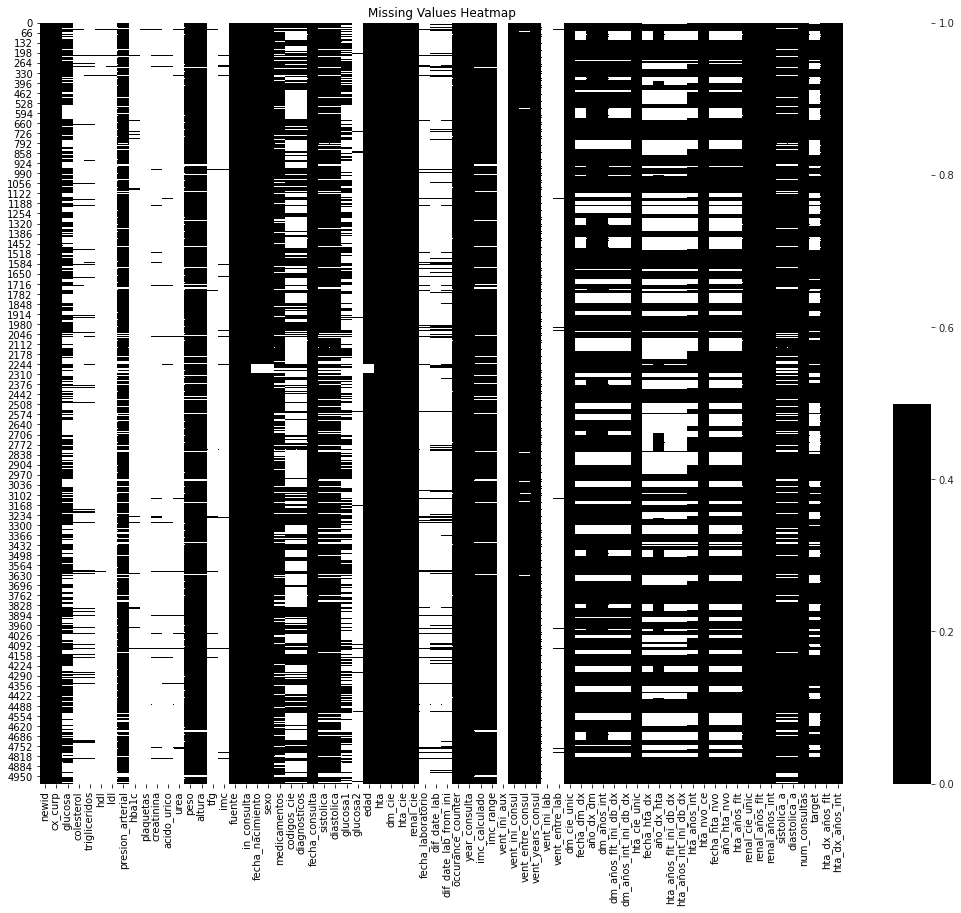

In [39]:
cols = df.columns 
colours = ["#000000","#FFFFFF"]
f, ax = plt.subplots(figsize = (18,14))
sns.set_style("whitegrid")
plt.title('Missing Values Heatmap', )
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours));

**Distribución de las variables númericas**

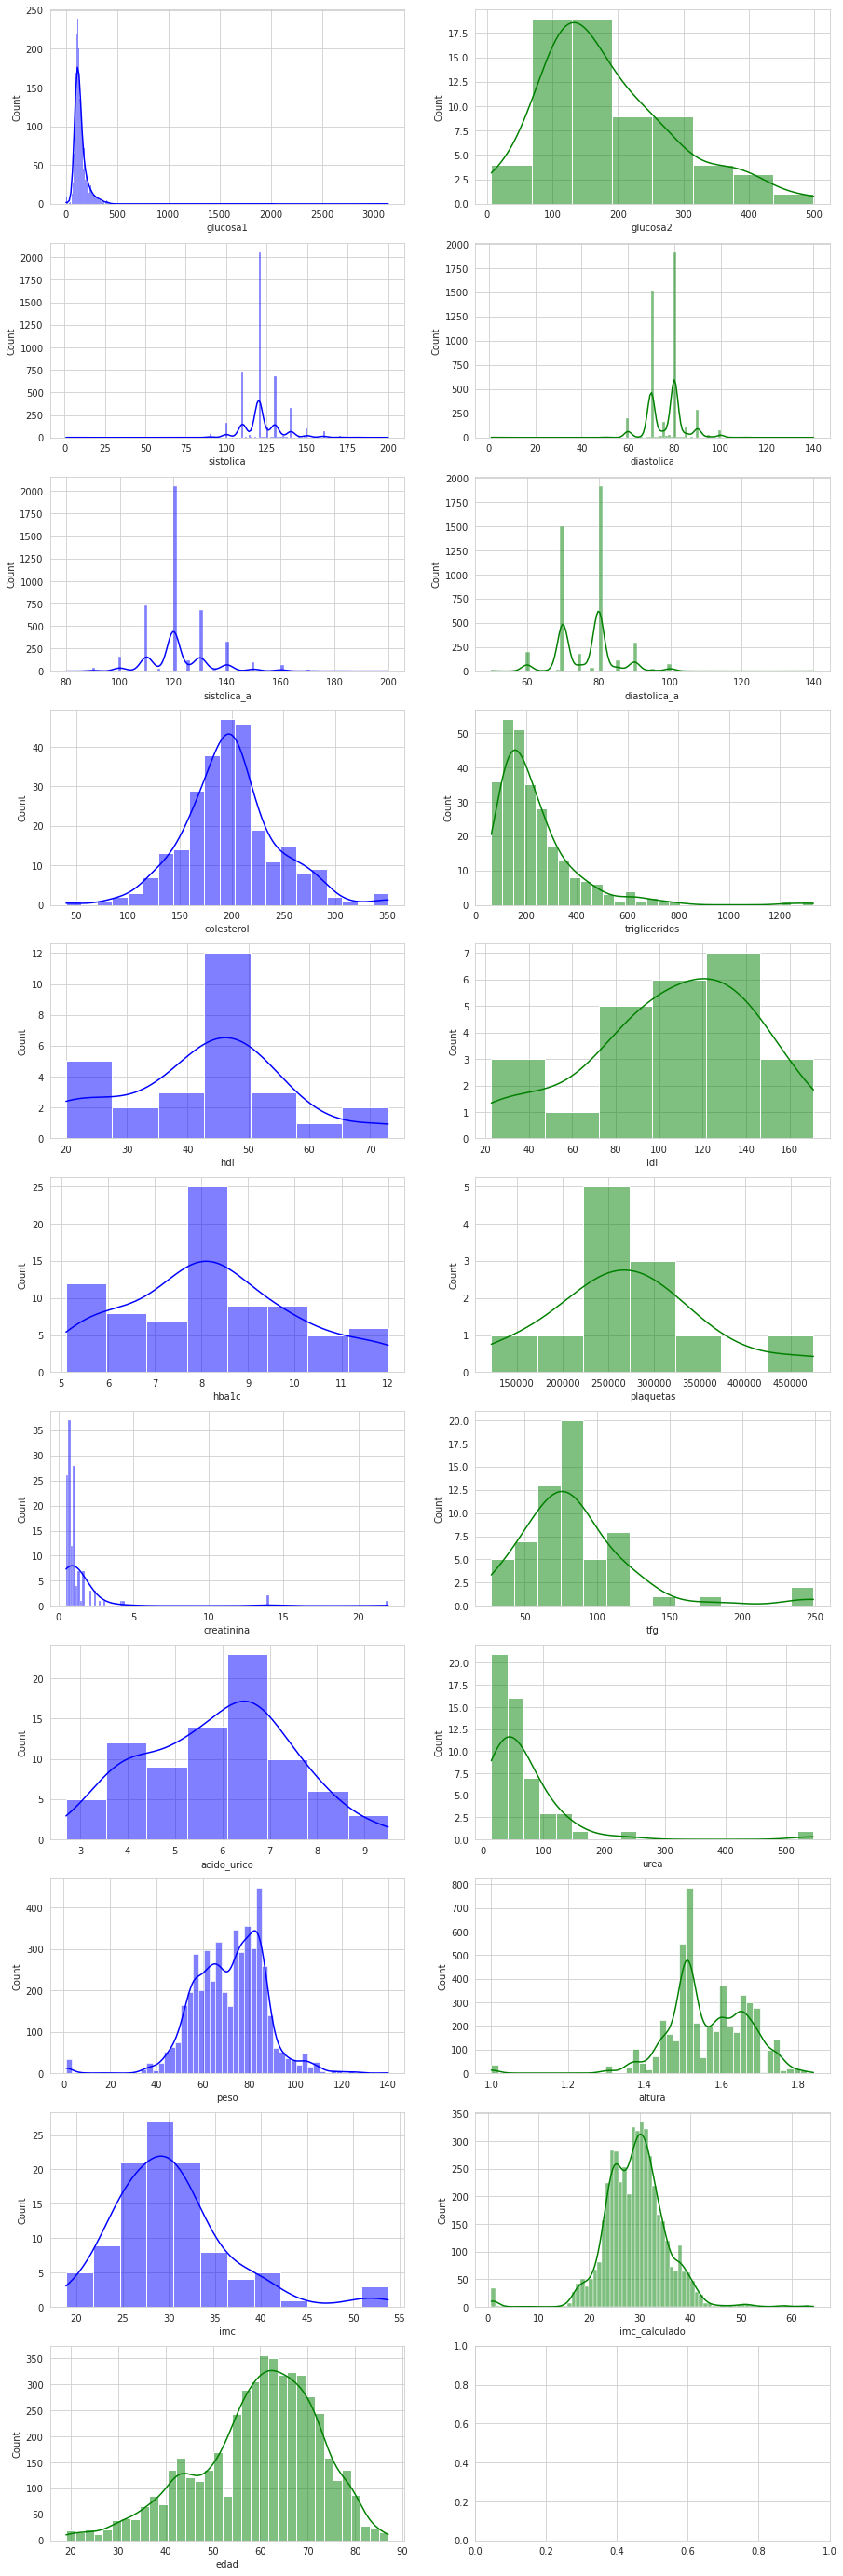

In [40]:
fig, axs = plt.subplots(11, 2, figsize=(15, 50))

sns.histplot(data = df, x="glucosa1", kde=True, color="blue", ax=axs[0,0])
sns.histplot(data = df, x="glucosa2", kde=True, color="green", ax=axs[0,1])
sns.histplot(data = df, x="sistolica", kde=True, color="blue", ax=axs[1,0])
sns.histplot(data = df, x="diastolica", kde=True, color="green", ax=axs[1,1])
sns.histplot(data = df, x="sistolica_a", kde=True, color="blue", ax=axs[2,0])
sns.histplot(data = df, x="diastolica_a", kde=True, color="green", ax=axs[2,1])
sns.histplot(data = df, x="colesterol", kde=True, color="blue", ax=axs[3,0])
sns.histplot(data = df, x="trigliceridos", kde=True, color="green", ax=axs[3,1])
sns.histplot(data = df, x="hdl", kde=True, color="blue", ax=axs[4,0])
sns.histplot(data = df, x="ldl", kde=True, color="green", ax=axs[4,1])
sns.histplot(data = df, x="hba1c", kde=True, color="blue", ax=axs[5,0])
sns.histplot(data = df, x="plaquetas", kde=True, color="green", ax=axs[5,1])
sns.histplot(data = df, x="creatinina", kde=True, color="blue", ax=axs[6,0])
sns.histplot(data = df, x="tfg", kde=True, color="green", ax=axs[6,1])
sns.histplot(data = df, x="acido_urico", kde=True, color="blue", ax=axs[7,0])
sns.histplot(data = df, x="urea", kde=True, color="green", ax=axs[7,1])
sns.histplot(data = df, x="peso", kde=True, color="blue", ax=axs[8,0])
sns.histplot(data = df, x="altura", kde=True, color="green", ax=axs[8,1])
sns.histplot(data = df, x="imc", kde=True, color="blue", ax=axs[9,0])
sns.histplot(data = df, x="imc_calculado", kde=True, color="green", ax=axs[9,1])
sns.histplot(data = df, x="edad", kde=True, color="green", ax=axs[10,0])

plt.show()

**Edad primera toma presión arterial y Edad presión primera presión arterial alta** 

<AxesSubplot:xlabel='edad', ylabel='Count'>

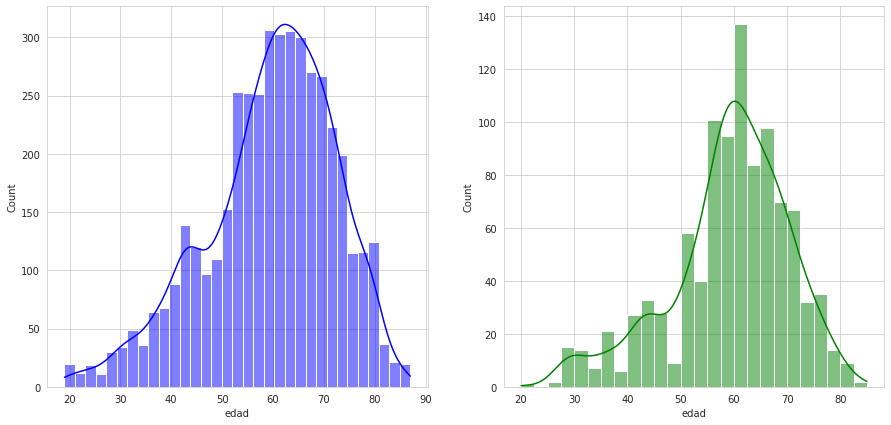

In [41]:
df_pru1 = df[(~df['sistolica'].isnull()) & (df.sistolica != 0) &
       (~df['diastolica'].isnull()) & (df.diastolica != 0) & (~df['edad'].isnull())]\
      [['newid','sistolica','diastolica','edad','fecha_consulta']].sort_values('newid')

df_pru2 = df[(df.sistolica >= 130) & (df.diastolica >= 80) & (~df['edad'].isnull())]\
      [['newid','sistolica','diastolica','edad','fecha_consulta']].sort_values('newid')

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data = df_pru1.groupby(["newid", "edad"])["fecha_consulta"].first(),\
             x="edad", kde=True, color="blue", ax=axs[0])
sns.histplot(data = df_pru2.groupby(["newid", "edad"])["fecha_consulta"].first(),\
             x="edad", kde=True, color="green", ax=axs[1])

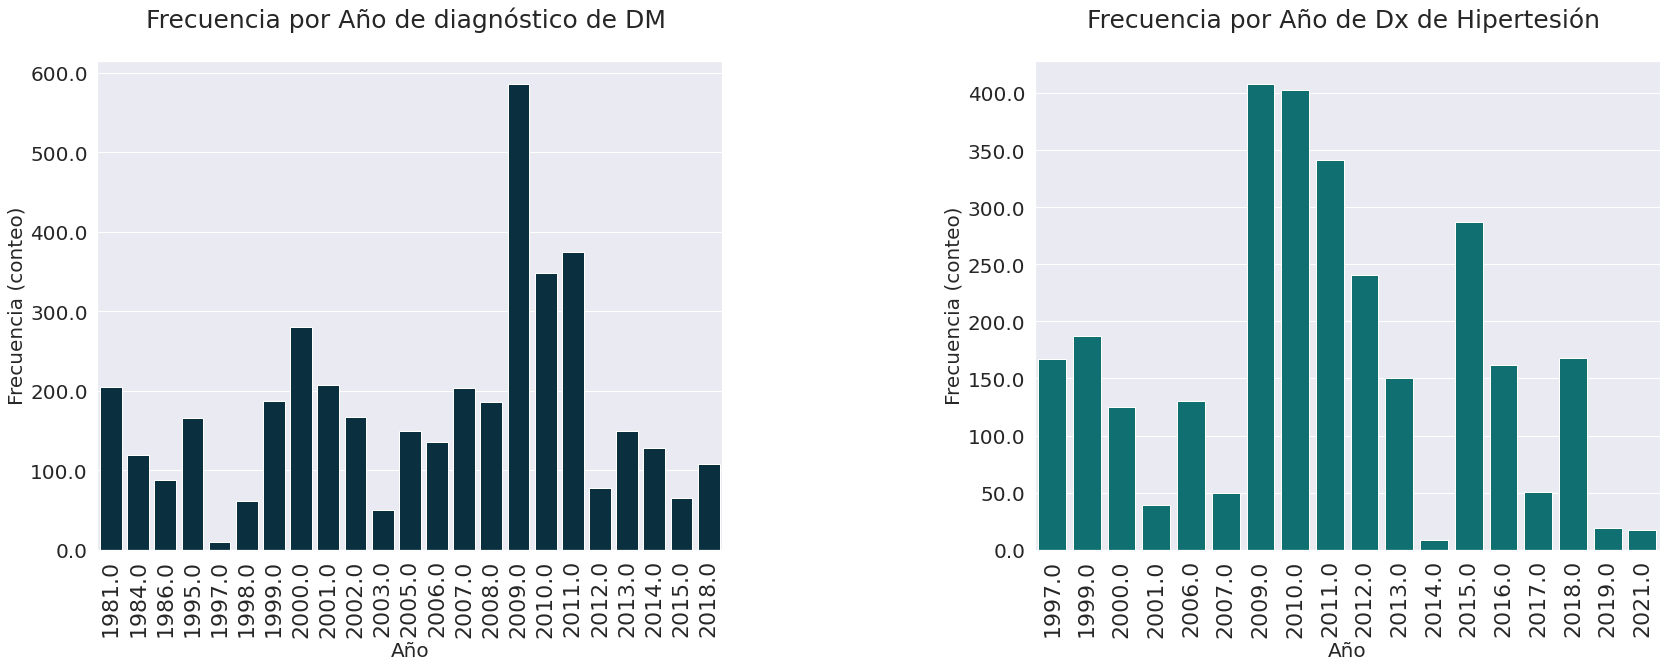

In [42]:
order = df['año_dx_dm'].sort_values().unique()
order = order[~pd.isnull(order)]

sns.set(font_scale = 2)
f, axes = plt.subplots(1, 2, figsize=(28, 9), gridspec_kw={'hspace': 1, 'wspace': 0.5})
g1 = sns.countplot(df["año_dx_dm"], order= order, ax=axes[0], color="#023246")
g1.axes.set_title("Frecuencia por Año de diagnóstico de DM \n",fontsize=25)
g1.set_xlabel("Año",fontsize=20)
g1.set_ylabel("Frecuencia (conteo)",fontsize=20)
g1.set_yticklabels(g1.get_yticks(), size = 20)              
g1.set_xticklabels(g1.get_xticklabels(),rotation = 90)

order = df['año_dx_hta'].sort_values().unique()
order = order[~pd.isnull(order)]

g2 = sns.countplot(df["año_dx_hta"], order= order, ax=axes[1], color="#008081")
g2.axes.set_title("Frecuencia por Año de Dx de Hipertesión \n",fontsize=25)
g2.set_xlabel("Año",fontsize=20)
aux = g2.set_ylabel("Frecuencia (conteo)",fontsize=20)
g2.set_yticklabels(g2.get_yticks(), size = 20)    
g2.set_xticklabels(g2.get_xticklabels(),rotation = 90)
print("")

<Figure size 4000x4000 with 0 Axes>

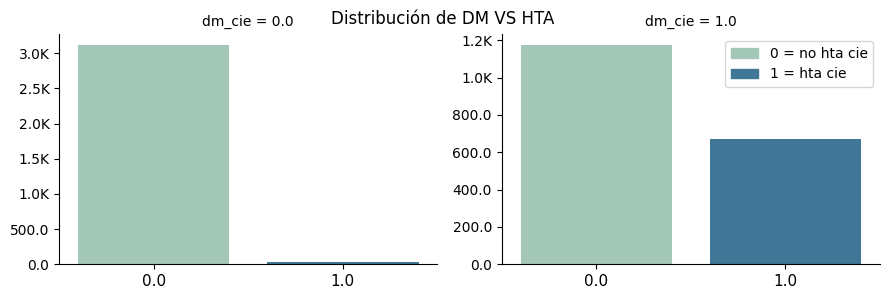

In [43]:
sns.reset_defaults()
dm_hta = df_aux.groupby(['dm_cie', 'hta_cie'],
                          as_index=False)['newid']\
                          .count()\
                          .rename(columns={'newid': 'registros'})

fig = plt.figure(figsize=(40,40))
colors = ['#9ECEB8', '#327BA4']# colores de 'YlGnBu'

a = sns.FacetGrid(data=dm_hta, col='dm_cie', col_wrap=2, sharex=False, sharey=False,
                 aspect=1.5)
a.map_dataframe(sns.barplot, x='hta_cie', y='registros', palette = colors)
for ax in a.axes.flat:
    for label in ax.get_xticklabels():
        label.set_size(11)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(utils.number_formatter))
        a.fig.tight_layout()
    
plt.subplots_adjust(top=0.9)

aux = a.fig.suptitle("Distribución de DM VS HTA \n \n \n", fontsize=12)


# The color cycles are going to all the same, doesn't matter which axes we use
Ax = a.axes[0]


# Some how for a plot of 5 bars, there are 6 patches, what is the 6th one?
Boxes = [item for item in Ax.get_children()
         if isinstance(item, matplotlib.patches.Rectangle)][:-1]

# There is no labels, need to define the labels
legend_labels  = ['0 = no hta cie', '1 = hta cie']

# Create the legend patches
legend_patches = [matplotlib.patches.Patch(color=C, label=L) for
                  C, L in zip([item.get_facecolor() for item in Boxes],
                              legend_labels)]

# Plot the legend
plt.legend(handles=legend_patches)

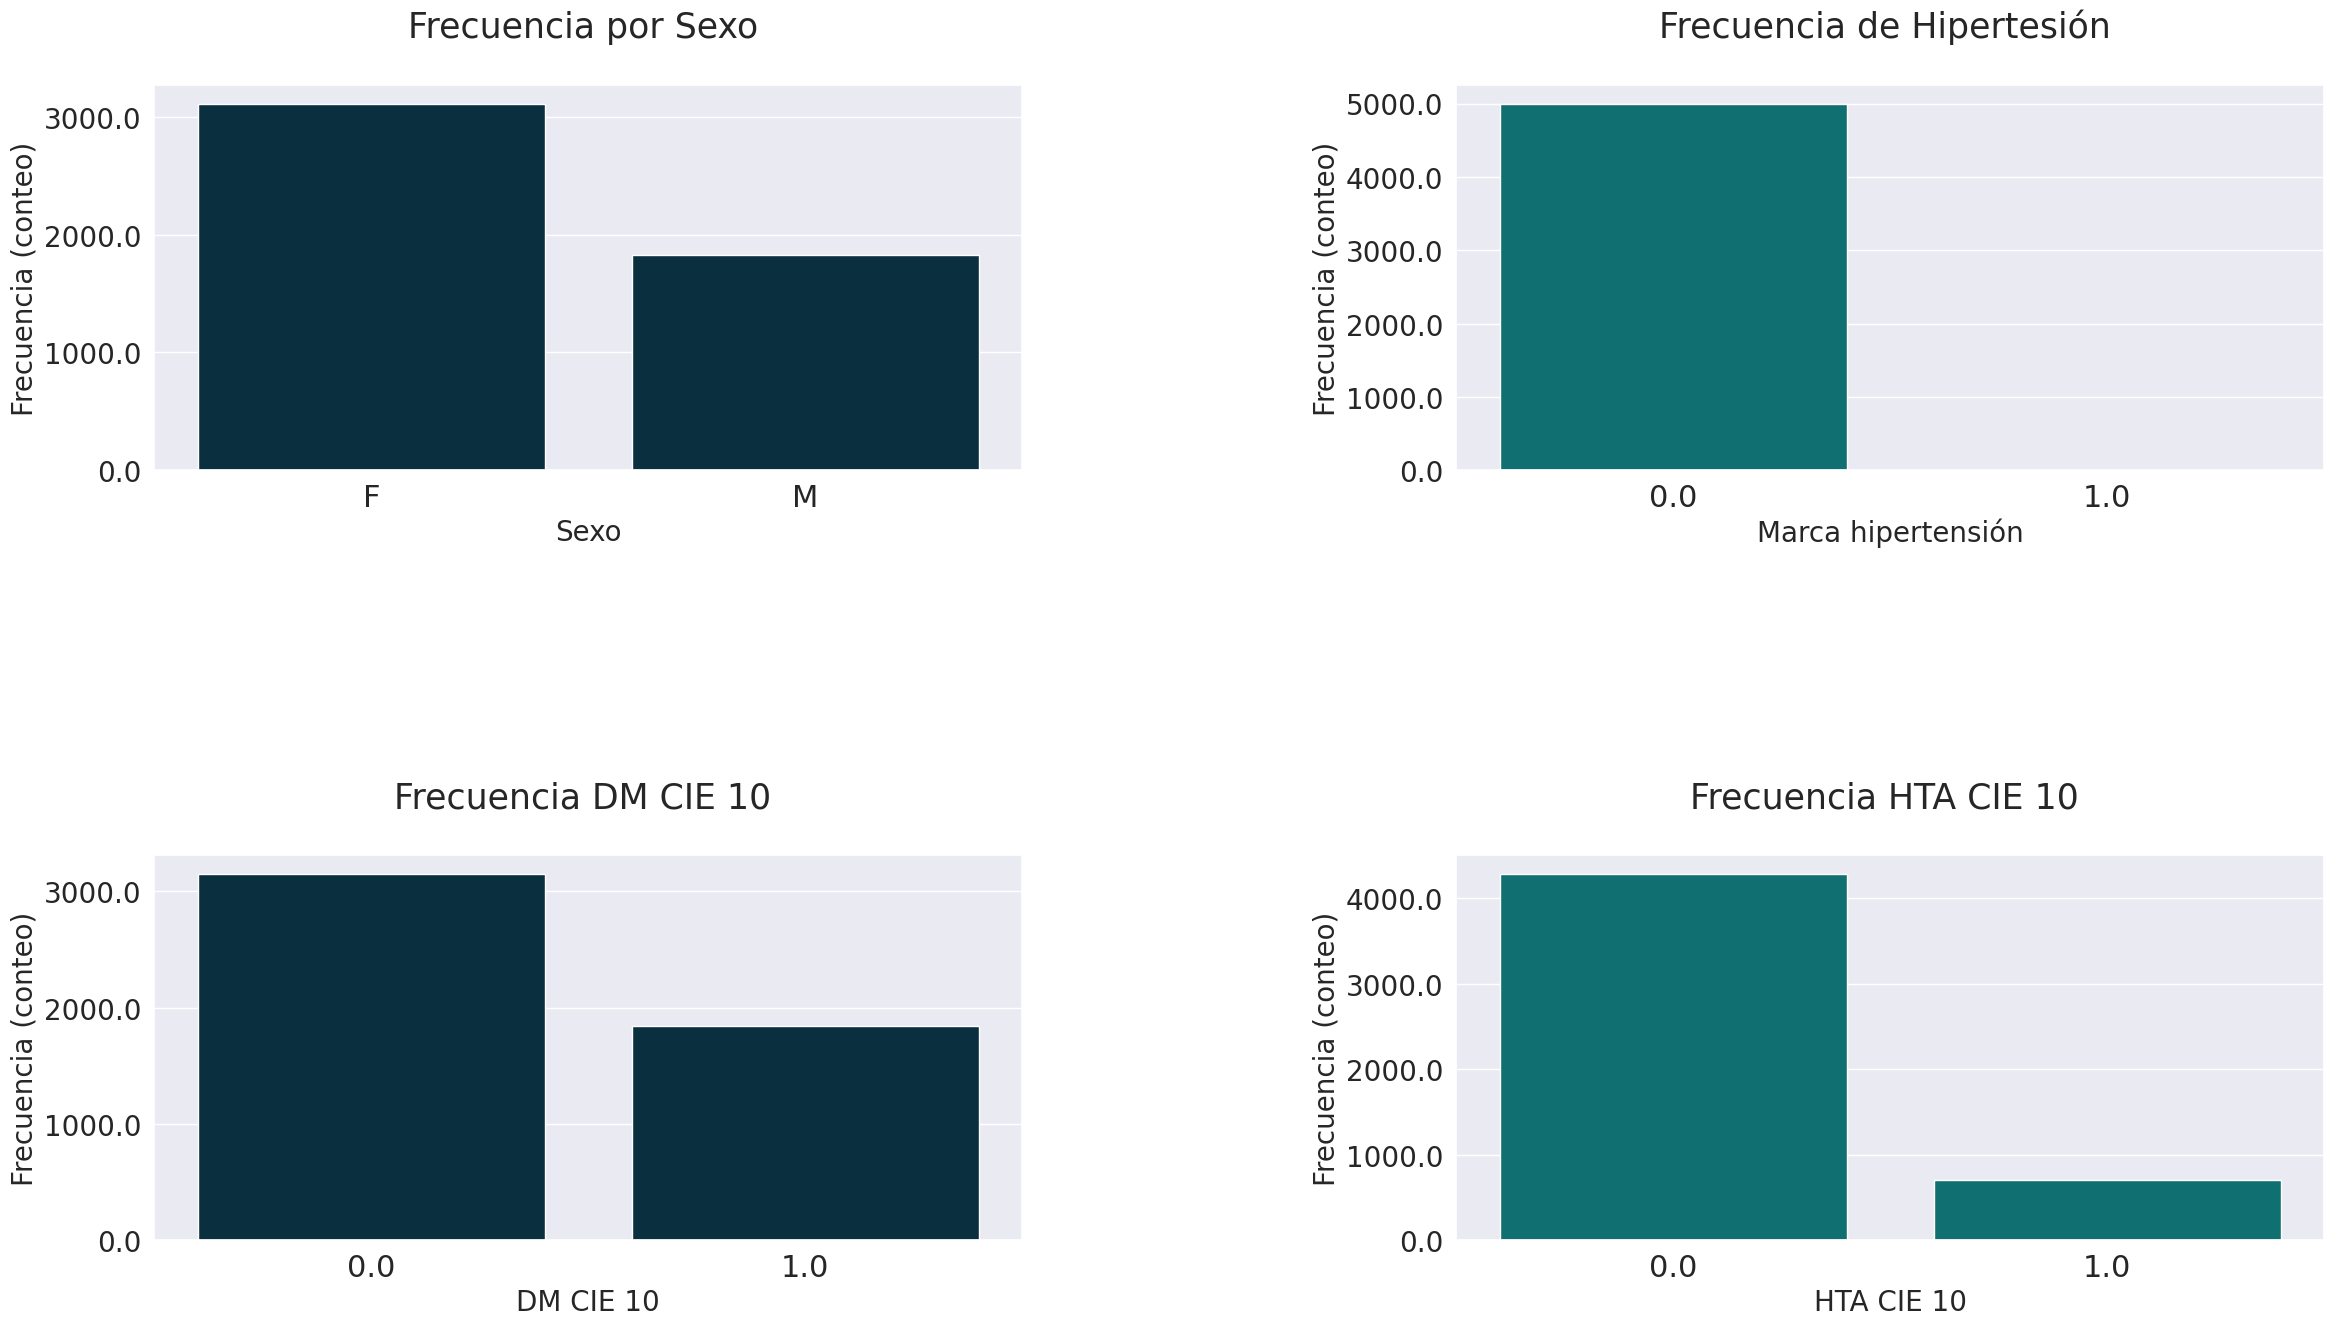

In [44]:
sns.set(font_scale = 2)
f, axes = plt.subplots(2, 2, figsize=(28, 15), gridspec_kw={'hspace': 1, 'wspace': 0.5})

g1 = sns.countplot(df_aux["sexo"], ax=axes[0,0], color="#023246")
g1.axes.set_title("Frecuencia por Sexo \n",fontsize=25)
g1.set_xlabel("Sexo",fontsize=20)
g1.set_ylabel("Frecuencia (conteo)",fontsize=20)
g1.set_yticklabels(g1.get_yticks(), size = 20)              
#g1.set_xticklabels(g1.get_xticklabels(),rotation = 90)

g2 = sns.countplot(df_aux["hta"], ax=axes[0,1], color="#008081")
g2.axes.set_title("Frecuencia de Hipertesión \n",fontsize=25)
g2.set_xlabel("Marca hipertensión",fontsize=20)
g2.set_ylabel("Frecuencia (conteo)",fontsize=20)
g2.set_yticklabels(g2.get_yticks(), size = 20)    
#g2.set_xticklabels(g2.get_xticklabels(),rotation = 90)

g3 = sns.countplot(df_aux["dm_cie"], ax=axes[1,0], color="#023246")
g3.axes.set_title("Frecuencia DM CIE 10 \n",fontsize=25)
g3.set_xlabel("DM CIE 10",fontsize=20)
g3.set_ylabel("Frecuencia (conteo)",fontsize=20)
g3.set_yticklabels(g3.get_yticks(), size = 20)              
#g3.set_xticklabels(g3.get_xticklabels(),rotation = 90)

g4 = sns.countplot(df_aux["hta_cie"], ax=axes[1,1], color="#008081")
g4.axes.set_title("Frecuencia HTA CIE 10 \n",fontsize=25)
g4.set_xlabel("HTA CIE 10",fontsize=20)
g4.set_ylabel("Frecuencia (conteo)",fontsize=20)
g4.set_yticklabels(g4.get_yticks(), size = 20)    
#g4.set_xticklabels(g4.get_xticklabels(),rotation = 90)

print("")

**Covariables**

In [45]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

- Relacion IMC Presion arterial

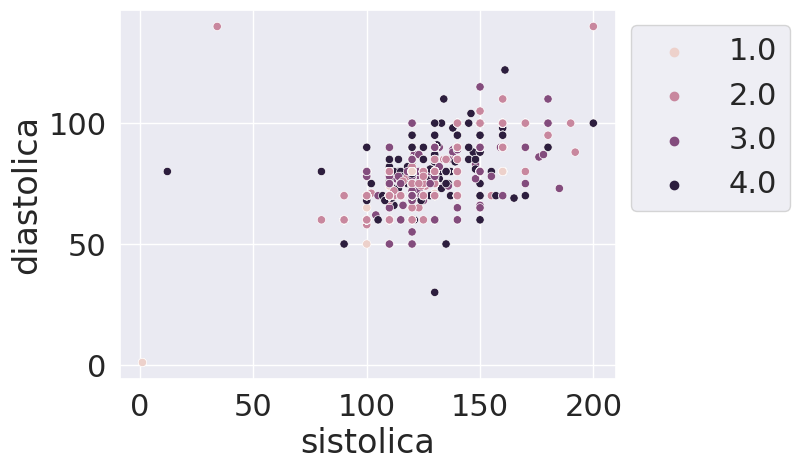

In [46]:
sns.scatterplot(x='sistolica', y='diastolica', hue='imc_range', data=df)  
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

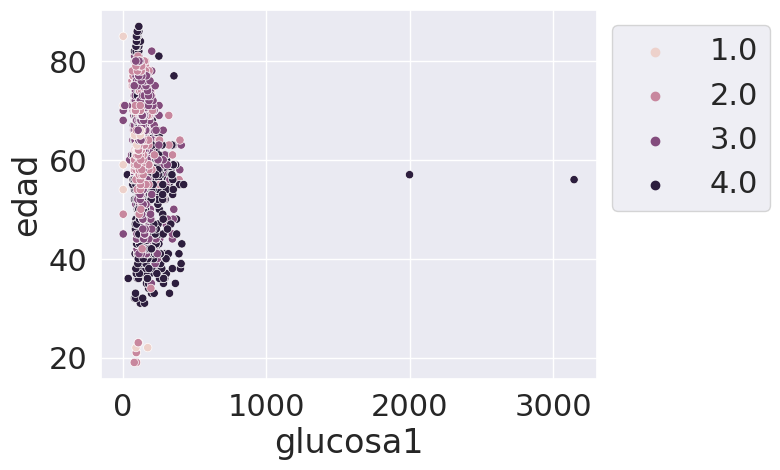

In [47]:
sns.scatterplot(x='glucosa1', y='edad', hue='imc_range', data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


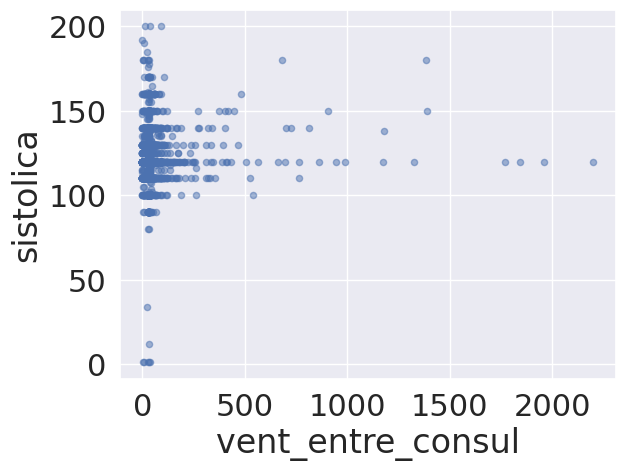

In [48]:
df.plot.scatter(x='vent_entre_consul', y='sistolica', alpha = 0.5);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


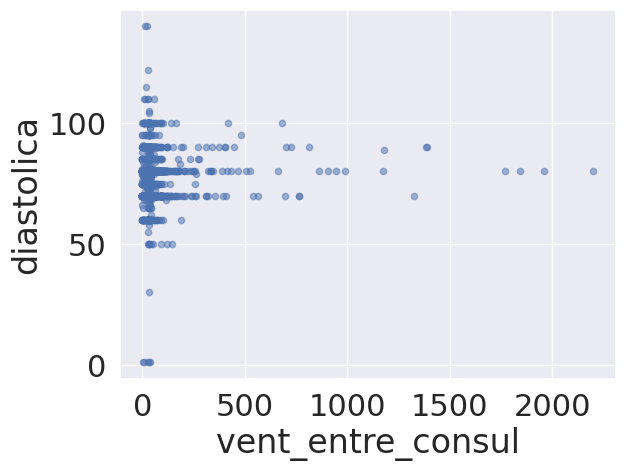

In [49]:
df.plot.scatter(x='vent_entre_consul', y='diastolica', alpha = 0.5);

- Número de consultas

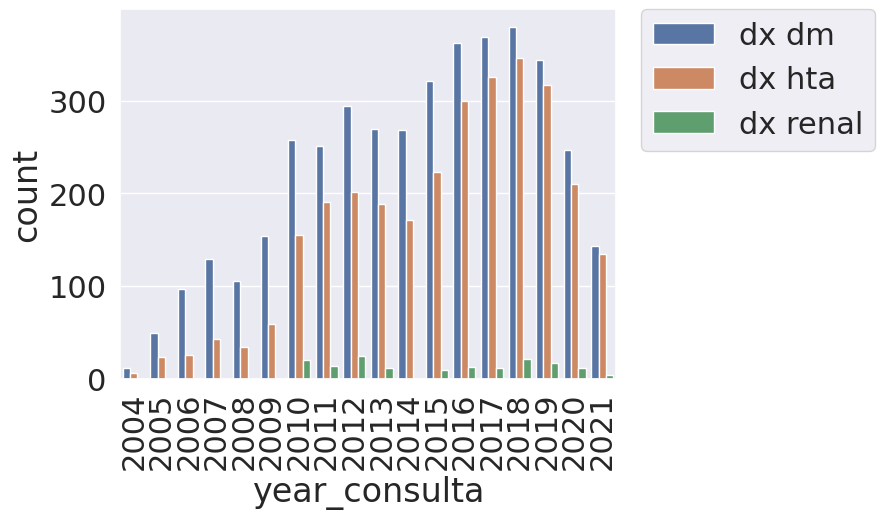

In [50]:
df_dm = df[df['dm_cie_unic']==1][['num_consultas','year_consulta']]
df_dm["type"] = "dx dm"
df_hta = df[df['hta_cie_unic']==1][['num_consultas','year_consulta']]
df_hta["type"] = "dx hta"
df_ren = df[df['renal_cie_unic']==1][['num_consultas','year_consulta']]
df_ren["type"] = "dx renal"

df_con = pd.concat([df_dm, df_hta])
df_con = pd.concat([df_con, df_ren])

# count plot on two categorical variable
sns.countplot(x ='year_consulta', hue = "type", data = df_con)
plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

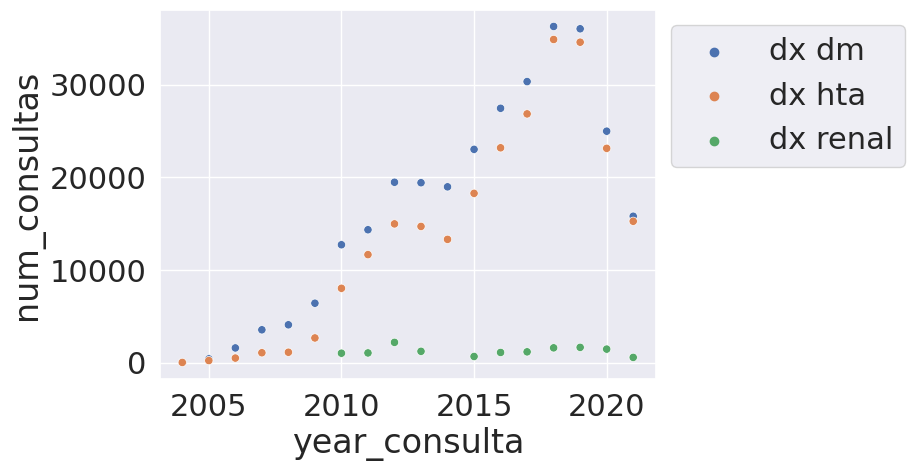

In [51]:
df_con = df_con.groupby(['year_consulta','type'])['num_consultas'].sum().reset_index()
sns.scatterplot(x='year_consulta', y='num_consultas', hue='type', data=df_con)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

No handles with labels found to put in legend.


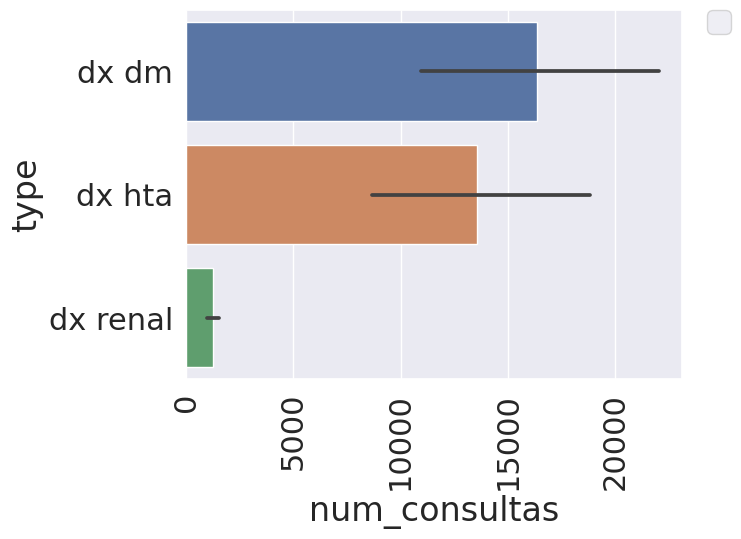

In [52]:
# count plot on two categorical variable
sns.barplot(x = 'num_consultas', y = 'type',data = df_con)
plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

In [53]:
df_dm = df[['cx_curp','fecha_consulta','dm_cie_unic']]
df_dm['dm_cie_unic'] = np.where(pd.isna(df_dm['dm_cie_unic']),0,1)
df_dm["type"] = "dx dm"
df_hta = df[['cx_curp','fecha_consulta','target']]
df_hta['dm_cie_unic'] = np.where(pd.isna(df_hta['target']),0,1)
df_hta["type"] = "dx hta"
df_dm_hta = df[['cx_curp','fecha_consulta','dm_cie_unic','target']]
df_dm_hta['dm_hta_cie_unic'] = np.where((~pd.isna(df_dm_hta['dm_cie_unic']))&\
                                        (~pd.isna(df_dm_hta['target'])),0,1)
df_dm_hta["type"] = "dx dm hta"

In [54]:
df_dm = df[['cx_curp','year_consulta','dm_cie_unic']]
df_dm['dm_cie_unic'] = np.where(pd.isna(df_dm['dm_cie_unic']),0,1)
df_dm["type"] = "dx dm"

In [55]:
df[df['cx_curp']=='AAAZ581217189U5PC3'].sort_values(by = ['fecha_consulta'])[['cx_curp','fecha_consulta']]

,cx_curp,fecha_consulta
0,AAAZ581217189U5PC3,2014-09-09 08:51:37.470
1,AAAZ581217189U5PC3,2014-10-16 11:35:28.873
2,AAAZ581217189U5PC3,2014-11-25 11:39:53.817
3,AAAZ581217189U5PC3,2015-01-07 11:01:51.827
4,AAAZ581217189U5PC3,2015-02-09 11:43:48.210
...,...,...
57,AAAZ581217189U5PC3,2019-07-16 09:55:49.673
58,AAAZ581217189U5PC3,2019-08-16 09:21:59.417
59,AAAZ581217189U5PC3,2019-09-25 11:12:21.493
60,AAAZ581217189U5PC3,2019-11-01 12:48:17.083


- **Asistencia a consulta por año**

In [56]:
step0 = pd.crosstab(
    df['cx_curp'], 
    df['year_consulta']
)
step0 = pd.DataFrame(step0.reset_index())
step0.head(5)

year_consulta,cx_curp,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AAAZ581217189U5PC3,0,0,0,0,0,0,0,0,0,0,0,3,14,12,9,13,11,0,0
1,AADV5603014KS44QC1,0,4,13,12,10,8,12,10,12,10,9,10,15,13,15,16,14,4,0
2,AEDJ750301XGAEGRC1,0,0,0,0,2,2,0,0,1,5,1,0,2,4,3,0,0,2,0
3,AOCC511229UR4RIRC3,0,0,0,0,0,0,0,0,0,4,12,9,15,12,13,8,10,4,0
4,BOLM631201LV35XPC1,0,0,1,12,4,7,5,6,6,3,6,5,0,0,3,8,9,8,6


In [57]:
step0['sum'] = 0
for i in range(2003,2022):
    step0[i] = np.where(step0[i]>0,1,0)
    step0['sum'] = step0[i]+step0['sum']
orange = sns.light_palette("orange", as_cmap=True)
step0.sort_values(by = ['sum'], ascending = False).style.background_gradient(cmap=orange)

year_consulta,cx_curp,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,sum
29,MAXA480701EQOUDRC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19
14,DIJC38112055K14KA2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,18
39,PEVR470901ASKH1QC1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,18
22,HEXE490230BS8EFVA2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,18
54,ZEPL5503219FZQ6QC2,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,17
6,CAAJ770616UNX3HRC2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
1,AADV5603014KS44QC1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
15,DIRL630201M8ADARC1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,17
38,PEGO194405B3QH4QC1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
7,CABM400930CPT4ZCA2,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,16


In [58]:
df2 = df.groupby(['cx_curp','year_consulta']).size().reset_index(name='counts')
df2['counts'] = 1
df2

,cx_curp,year_consulta,counts
0,AAAZ581217189U5PC3,2014,1
1,AAAZ581217189U5PC3,2015,1
2,AAAZ581217189U5PC3,2016,1
3,AAAZ581217189U5PC3,2017,1
4,AAAZ581217189U5PC3,2018,1
...,...,...,...
571,ZEPL5503219FZQ6QC2,2017,1
572,ZEPL5503219FZQ6QC2,2018,1
573,ZEPL5503219FZQ6QC2,2019,1
574,ZEPL5503219FZQ6QC2,2020,1


- **Consultas por año**

In [59]:
step1 = pd.crosstab(
    df['cx_curp'], 
    df['vent_years_consul']
)
step1 = pd.DataFrame(step1.reset_index())
step1['sum'] = 0
for i in range(0,18):
    step1[i] = np.where(step1[i]>0,1,0)
    step1['sum'] = step1[i]+step1['sum']

orange = sns.light_palette("orange", as_cmap=True)
step1.sort_values(by = ['sum'], ascending = False).style.background_gradient(cmap=orange)

vent_years_consul,cx_curp,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,sum
39,PEVR470901ASKH1QC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,18
29,MAXA480701EQOUDRC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,18
54,ZEPL5503219FZQ6QC2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
14,DIJC38112055K14KA2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
22,HEXE490230BS8EFVA2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
15,DIRL630201M8ADARC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
1,AADV5603014KS44QC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,16
27,MAJJ870410UVK09PC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,16
7,CABM400930CPT4ZCA2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,16
6,CAAJ770616UNX3HRC2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,16


In [60]:
df_dm_mark = df[df['dm_cie_unic']==1][['cx_curp','vent_years_consul']]
df_dm_mark['dm'] = 2
df_dm_mark = df_dm_mark.drop_duplicates()
display(df_dm_mark.head())
print(df_dm_mark.shape)
step3 = pd.crosstab(
    df_dm_mark['cx_curp'], 
    df_dm_mark['vent_years_consul']
)
step3 = pd.DataFrame(step3.reset_index())
step3.head(5)

,cx_curp,vent_years_consul,dm
0,AAAZ581217189U5PC3,0,2
14,AAAZ581217189U5PC3,1,2
26,AAAZ581217189U5PC3,2,2
35,AAAZ581217189U5PC3,3,2
48,AAAZ581217189U5PC3,4,2


(441, 3)


vent_years_consul,cx_curp,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,AAAZ581217189U5PC3,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,AADV5603014KS44QC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
2,AEDJ750301XGAEGRC1,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0
3,AOCC511229UR4RIRC3,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
4,BOLM631201LV35XPC1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0


In [61]:
df_dm_mark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 4985
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cx_curp            441 non-null    object
 1   vent_years_consul  441 non-null    int64 
 2   dm                 441 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.8+ KB


In [62]:
for x in range(0,18):
    step1[x] = step1[x].fillna(0).astype(int)

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
def background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

In [64]:
step_resp = step1
orange = sns.light_palette("orange", as_cmap=True)
step1.sort_values(by = ['sum'], ascending = False).style.background_gradient(cmap=orange)

vent_years_consul,cx_curp,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,sum
39,PEVR470901ASKH1QC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,18
29,MAXA480701EQOUDRC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,18
54,ZEPL5503219FZQ6QC2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
14,DIJC38112055K14KA2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
22,HEXE490230BS8EFVA2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
15,DIRL630201M8ADARC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
1,AADV5603014KS44QC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,16
27,MAJJ870410UVK09PC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,16
7,CABM400930CPT4ZCA2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,16
6,CAAJ770616UNX3HRC2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,16


In [65]:
step1.columns

Index(['cx_curp', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
       'sum'],
      dtype='object', name='vent_years_consul')

In [66]:
step1 = step1.set_index('cx_curp')
step1.columns = ['0', '1', '2','3','4','5','6','7','8','9','10',\
                 '11','12','13','14','15','16','17','sum']
step1 = step1.sort_values(by = ['sum'], ascending = False)
step1.style.apply(background_gradient,
               cmap='PuBu',
               m=step1.min().min(),
               M=step1.max().max(),
               low=0,
               high=0.2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,sum
cx_curp,,,,,,,,,,,,,,,,,,,
PEVR470901ASKH1QC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,18
MAXA480701EQOUDRC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,18
ZEPL5503219FZQ6QC2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
DIJC38112055K14KA2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
HEXE490230BS8EFVA2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
DIRL630201M8ADARC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,17
AADV5603014KS44QC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,16
MAJJ870410UVK09PC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,16
CABM400930CPT4ZCA2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,16


- Tipo de pacientes por año

In [67]:
step_resp.drop('cx_curp', axis=1, inplace=True)
step_resp.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 'sum'], dtype='object', name='vent_years_consul')

In [68]:
x = step_resp[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
x['years'] = x.index
display(x)
df_melt= pd.melt(x, id_vars=None,value_vars=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],\
                 var_name='years',value_name='type_pac')
display(df_melt)
print(df_melt['type_pac'].unique())
df_melt['num'] = 1

vent_years_consul,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,years
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
2,1,1,0,0,1,1,1,0,1,1,1,0,0,1,0,0,0,0,2
3,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,3
4,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,4
5,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,5
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,6
7,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,7
8,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,8
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


,years,type_pac
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
985,17,0
986,17,0
987,17,0
988,17,0


[1 0]


In [69]:
for i in range(len(df_melt['years'])):
    x = df_melt['type_pac'][i]
    if x == 0:
        df_melt['type_pac'][i] = 'Sin DX: DM, HTA, RENAL'
    elif x == 1:
        df_melt['type_pac'][i] = 'DM'
    elif x == 2:
        df_melt['type_pac'][i] = 'HTA'
    elif x == 3:
        df_melt['type_pac'][i] = 'DM y HTA'
    elif x == 4:
        df_melt['type_pac'][i] = 'DM y RENAL'
    elif x == 6:
        df_melt['type_pac'][i] = 'DM, HTA, RENAL'
    else:
        df_melt['type_pac'][i] = np.nan
        
df_melt

,years,type_pac,num
0,0,DM,1
1,0,DM,1
2,0,DM,1
3,0,DM,1
4,0,DM,1
...,...,...,...
985,17,"Sin DX: DM, HTA, RENAL",1
986,17,"Sin DX: DM, HTA, RENAL",1
987,17,"Sin DX: DM, HTA, RENAL",1
988,17,"Sin DX: DM, HTA, RENAL",1


In [70]:
df_new = df_melt.groupby(['years', 'type_pac'])['num'].agg(['sum'])
df_new.reset_index()

,years,type_pac,sum
0,0,DM,55
1,1,DM,49
2,1,"Sin DX: DM, HTA, RENAL",6
3,2,DM,46
4,2,"Sin DX: DM, HTA, RENAL",9
5,3,DM,43
6,3,"Sin DX: DM, HTA, RENAL",12
7,4,DM,41
8,4,"Sin DX: DM, HTA, RENAL",14
9,5,DM,42


In [71]:
dist_pac = df_new.pivot_table('sum', ['years'], 'type_pac')
dist_pac

type_pac,DM,"Sin DX: DM, HTA, RENAL"
years,,
0,55.0,NaN
1,49.0,6.0
2,46.0,9.0
3,43.0,12.0
4,41.0,14.0
5,42.0,13.0
6,41.0,14.0
7,34.0,21.0
8,31.0,24.0


In [72]:
dist_pac = pd.DataFrame(dist_pac.reset_index())
print(dist_pac.columns)
dist_pac

Index(['years', 'DM', 'Sin DX: DM, HTA, RENAL'], dtype='object', name='type_pac')


type_pac,years,DM,"Sin DX: DM, HTA, RENAL"
0,0,55.0,NaN
1,1,49.0,6.0
2,2,46.0,9.0
3,3,43.0,12.0
4,4,41.0,14.0
5,5,42.0,13.0
6,6,41.0,14.0
7,7,34.0,21.0
8,8,31.0,24.0
9,9,27.0,28.0


In [73]:
#dist_pac = df_melt.pivot_table('num', ['years'], 'type_pac')
"""dist_pac = pd.DataFrame(dist_pac.reset_index())
print(dist_pac.columns)
dist_pac"""

'dist_pac = pd.DataFrame(dist_pac.reset_index())\nprint(dist_pac.columns)\ndist_pac'

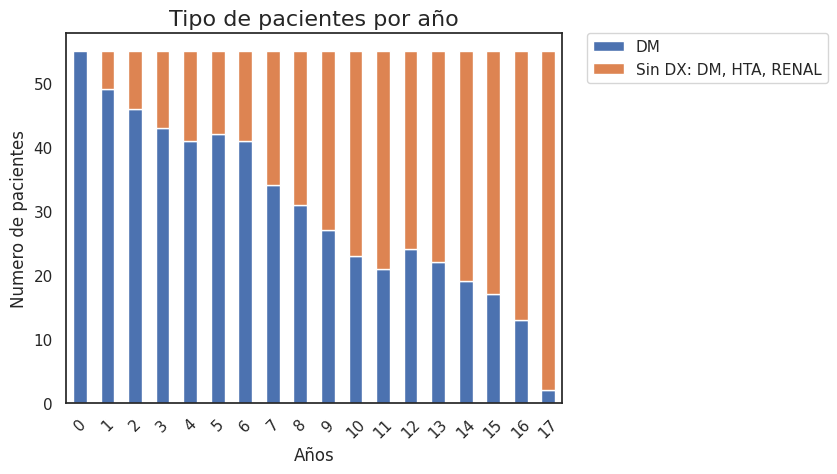

In [74]:
#set seaborn plotting aesthetics

sns.set(style='white')
sns.color_palette("Paired")
#create stacked bar chart
dist_pac.set_index('years').plot(kind='bar', stacked=True)

#add overall title
plt.title('Tipo de pacientes por año', fontsize=16)

#add axis titles
plt.xlabel('Años')
plt.ylabel('Numero de pacientes')

#rotate x-axis labels
plt.xticks(rotation=45)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [75]:
utils.save_df(df, "../data/transformation.pkl")

In [76]:
list(df.columns)

['newid',
 'cx_curp',
 'glucosa',
 'colesterol',
 'trigliceridos',
 'hdl',
 'ldl',
 'presion_arterial',
 'hba1c',
 'plaquetas',
 'creatinina',
 'acido_urico',
 'urea',
 'peso',
 'altura',
 'tfg',
 'imc',
 'fuente',
 'in_consulta',
 'fecha_nacimiento',
 'sexo',
 'medicamentos',
 'codigos_cie',
 'diagnosticos',
 'fecha_consulta',
 'sistolica',
 'diastolica',
 'glucosa1',
 'glucosa2',
 'edad',
 'hta',
 'dm_cie',
 'hta_cie',
 'renal_cie',
 'fecha_laboratorio',
 'dif_date_lab',
 'dif_date_lab_from_ini',
 'occurance_counter',
 'year_consulta',
 'imc_calculado',
 'imc_range',
 'vent_ini_aux',
 'vent_ini_consul',
 'vent_entre_consul',
 'vent_years_consul',
 'vent_ini_lab',
 'vent_entre_lab',
 'dm_cie_unic',
 'fecha_dm_dx',
 'año_dx_dm',
 'dm_años_int',
 'dm_años_flt_ini_db_dx',
 'dm_años_int_ini_db_dx',
 'hta_cie_unic',
 'fecha_hta_dx',
 'año_dx_hta',
 'hta_años_flt_ini_db_dx',
 'hta_años_int_ini_db_dx',
 'hta_años_int',
 'hta_nvo_ce',
 'fecha_hta_nvo',
 'año_hta_nvo',
 'hta_años_flt',
 'renal